In [1]:
import math
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Cylinder radius
R = 3
# cylinder center
cx = 0
cy = 4

# compute radial position
def radial(x,y):
  # switch x and y to get the 0 to the contact point
  phi = math.atan2(x-cx, -y+cy)
  return phi*R

def load_rpqg_internal(filename, normal_col, tangential_col, gap_col):
  db = pd.read_csv(filename)
  xy = np.array([db['x'],db['y']]).T
  r = [radial(x,y) for x,y in xy]
  p = db[normal_col]
  q = db[tangential_col]
  g = db[gap_col]
  return zip(*sorted(zip(r, p, q, g)))

def load_rpqg(filename):
  return load_rpqg_internal(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure', 'normal_gap')


In [40]:
# load and prepare data
r1, p1, q1, g1 = load_rpqg_internal('cylinder_friction_surface_FINAL.csv', 'frictionless_normal_lm', 'tangential_lm', 'tangential_lm')
r2, p2, q2, g2 = load_rpqg('cylinder_friction_penalty_surface_FINAL.csv')
r3, p3, q3, g3 = load_rpqg('cylinder_friction_penalty_al_surface_FINAL.csv')


In [9]:
# analytical solutions
a = 0.09
mu = 0.4
Q = 0
P = -2.492000e+03
c = a

def p(r):
  p0 = 18200
  return (1-r**2/a**2)**0.5*p0 if r**2<a**2 else 0

def pa(rs):
  return [p(r) for r in rs]

# def qa(rs):
#   return [mu*p0*((1-r**2/a**2)**0.5) if r**2<a**2 else 0 or r in rs]
#   return [0.4*p(r) if  for r in rs]
  
  

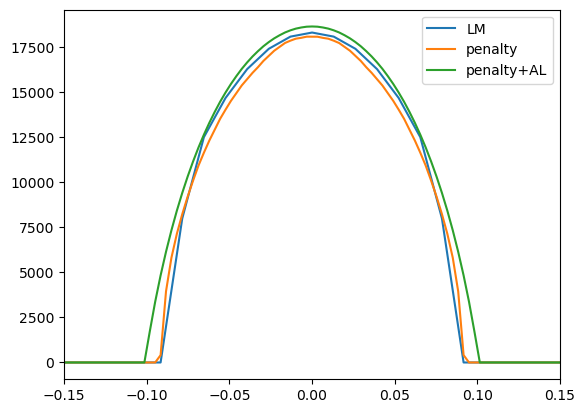

In [28]:
plt.plot(r1, p1, label='LM')
plt.plot(r2, p2, label='penalty')
plt.plot(r3, p3, label='penalty+AL')
#plt.plot(r1, pa(r1), '--', label='analytical')
plt.xlim(-0.15,0.15)
plt.legend()

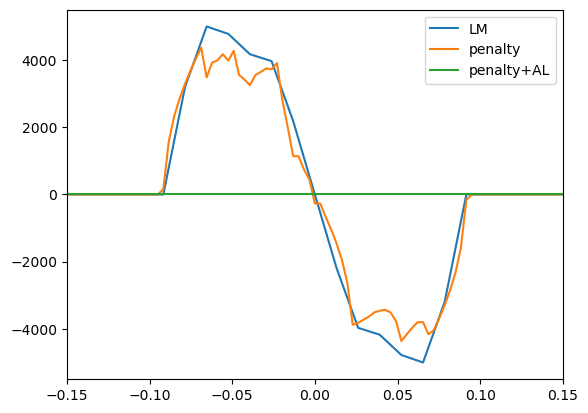

In [6]:
plt.plot(r1, q1, label='LM')
plt.plot(r2, q2, label='penalty')
plt.plot(r3, q3, label='penalty+AL')
plt.xlim(-0.15,0.15)
plt.legend()

In [55]:
a = 1.2-abs(np.array(r1))
b = a>0

In [56]:
b

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [107]:
len(r1), len(r2), len(r3)

(121, 241, 241)

(-0.15, 0.15)

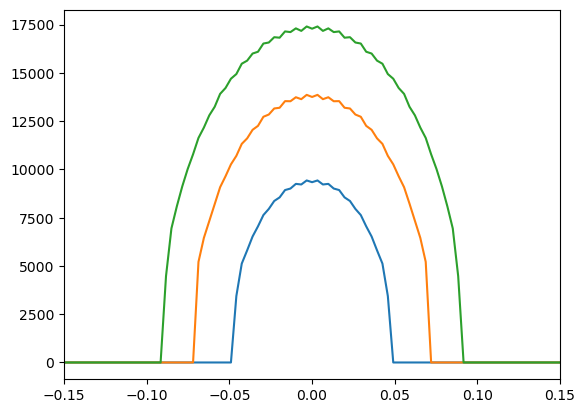

In [48]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q, w  = load_rpqg(filename)
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)
  

(-0.15, 0.15)

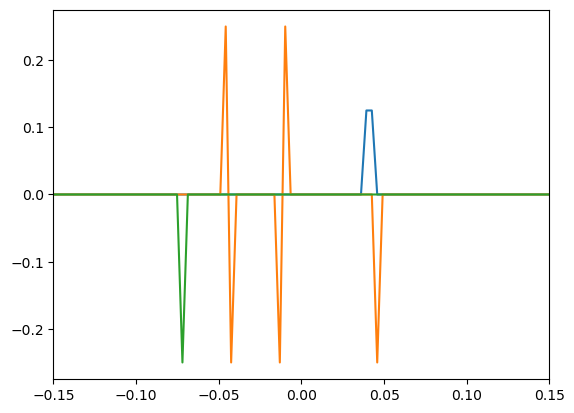

In [30]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,q)
  except:
    pass
  
plt.xlim(-0.15,0.15)


(-0.15, 0.15)

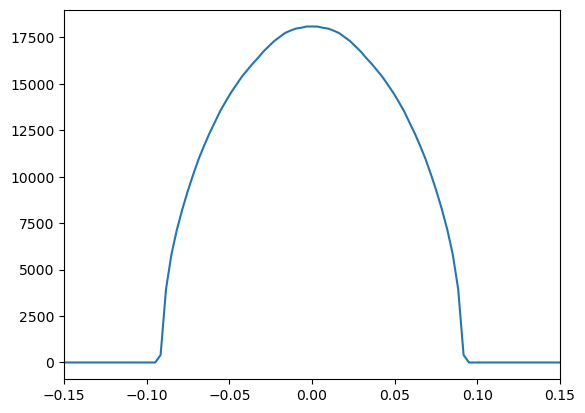

In [13]:
files = glob.glob("cylinder_friction_penalty_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)


(-0.15, 0.15)

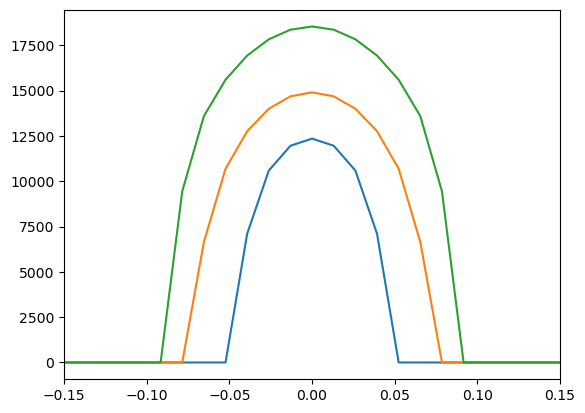

In [14]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)
  

(-0.15, 0.15)

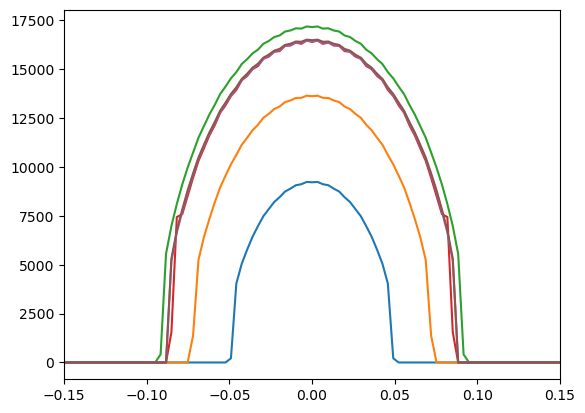

In [50]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)
  

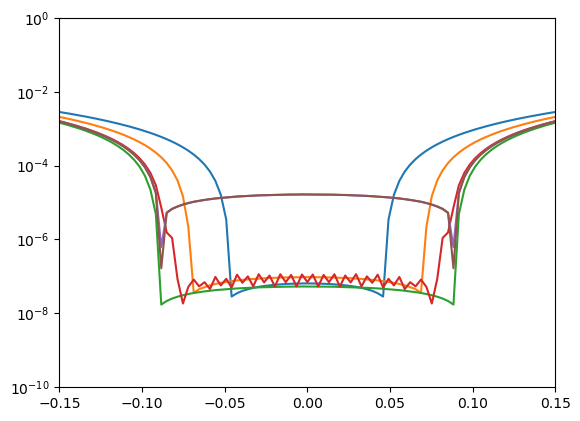

In [56]:
#Plot absolute gap distance
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q,w  = load_rpqg(filename)
    plt.plot(r,abs(np.array(w)), label=filename)
  except:
    pass
  
plt.xlim(-0.15,0.15)
plt.ylim(1e-10,1)
plt.yscale('log')

In [38]:
r,p,q,w  = load_rpqg("cylinder_friction_penalty_al_surface_0003.csv")
w

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6262467396034,
 1.5642782818051,
 1.4750815286024,
 1.3906207620621,
 1.3105816219816,
 1.2346808813304,
 1.162659094623,
 1.0942766031929,
 1.0293152829461,
 0.96757768203289,
 0.90888165816454,
 0.85305740503625,
 0.79994928897081,
 0.74941615276246,
 0.70132717922373,
 0.65555932146572,
 0.61199901703736,
 0.57054346629154,
 0.5310971270691,
 0.49356925507816,
 0.45787555670652,
 0.42394033238566,
 0.39169302407356,
 0.36106581683288,
 0.3319954602613,
 0.30442613792328,
 0.27830542201217,
 0.25358218035536,
 0.23020889171258,
 0.2081449919223,
 0.18735143054862,
 0.16778953507614,
 0.14942418210001,
 0.13222715709721,
 0.11616927875462,
 0.10122141241003,
 0.087359505949477,
 0.074567410017877,
 0.062822337110646,
 0.05211340762177,
 0.0453020